# **OBJECTIVE**

The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.

### **DATABASE CONNECTIVITY**

In [17]:
import mysql.connector

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
 def databaseConnect():
    connection = mysql.connector.connect(
    user='root',
    password='root',
    host='localhost',
    database='Ecommerce'
    )
    
    return connection

In [ ]:
conn=databaseConnect()
sql="SELECT * FROM customer"
customerFrame=pd.read_sql(sql,conn)
print(customerFrame)

sql="SELECT * FROM product"
productFrame=pd.read_sql(sql,conn)
print(productFrame)

sql="SELECT * FROM order_details"
orderFrame=pd.read_sql(sql,conn)
print(orderFrame)

### **DATA CLEANING**

In [20]:
conn=databaseConnect()
sql="SELECT * FROM customer"
customerFrame=pd.read_sql(sql,conn)
customerFrame.dropna(inplace=True)
customerFrame.drop_duplicates(inplace=True)

sql="SELECT * FROM product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
productFrame.drop_duplicates(inplace=True)

sql="SELECT * FROM order_details"
orderFrame=pd.read_sql(sql,conn)
orderFrame.dropna(inplace=True)
orderFrame.drop_duplicates(inplace=True)

print("Cleaned DataFrame")
print(customerFrame)
print(productFrame)
print(orderFrame)

Cleaned DataFrame
  customer_id              name          city                email  \
0        C001          John Doe      New York     john@example.com   
1        C002        Jane Smith   Los Angeles     jane@example.com   
2        C003     Alice Johnson       Chicago    alice@example.com   
3        C004         Bob Brown       Houston      bob@example.com   
4        C005       Emily Davis         Miami    emily@example.com   
5        C006    Michael Wilson        Dallas  michael@example.com   
6        C007  Jessica Martinez  Philadelphia  jessica@example.com   
7        C008    David Anderson       Phoenix    david@example.com   
8        C009      Sarah Taylor   San Antonio    sarah@example.com   
9        C010      Chris Garcia     San Diego    chris@example.com   

     phone_no       address  pin_code  
0  1234567890   123 Main St     10001  
1  9876543210    456 Elm St     90001  
2  5678901234    789 Oak St     60601  
3  2345678901   321 Pine St     77002  
4  78901234

C:\Users\annes\AppData\Local\Temp\ipykernel_7036\481151547.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customerFrame=pd.read_sql(sql,conn)
C:\Users\annes\AppData\Local\Temp\ipykernel_7036\481151547.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)
C:\Users\annes\AppData\Local\Temp\ipykernel_7036\481151547.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderFrame=pd.read_sql(sql,conn)


# **Exploratory Data Analysis (EDA) and Visualization:**

### Customer Analysis:

#### **Bar plot showing the total number of customers city-wise**

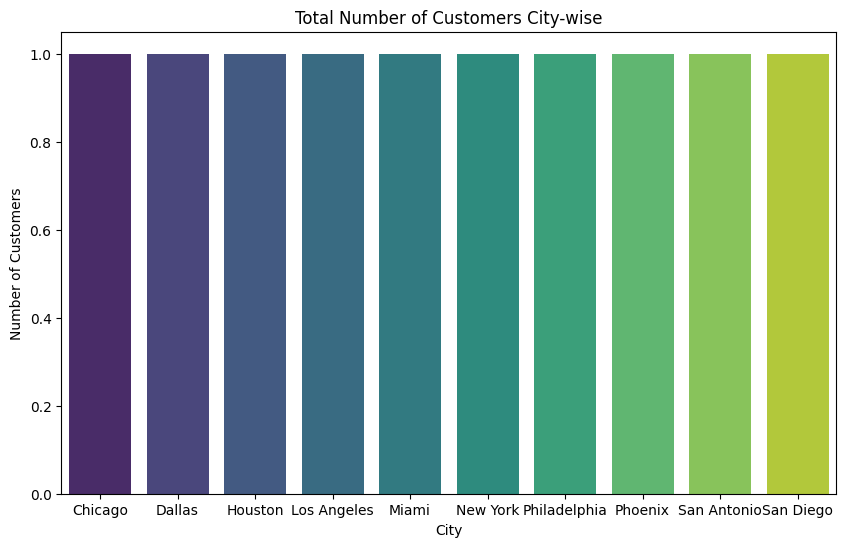

In [21]:
city_wise_customers = customerFrame.groupby('city').size().reset_index(name='customer_count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=city_wise_customers, x='city', y='customer_count', hue='city', palette='viridis', legend=False)
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

#### The most frequent customers based on their order history

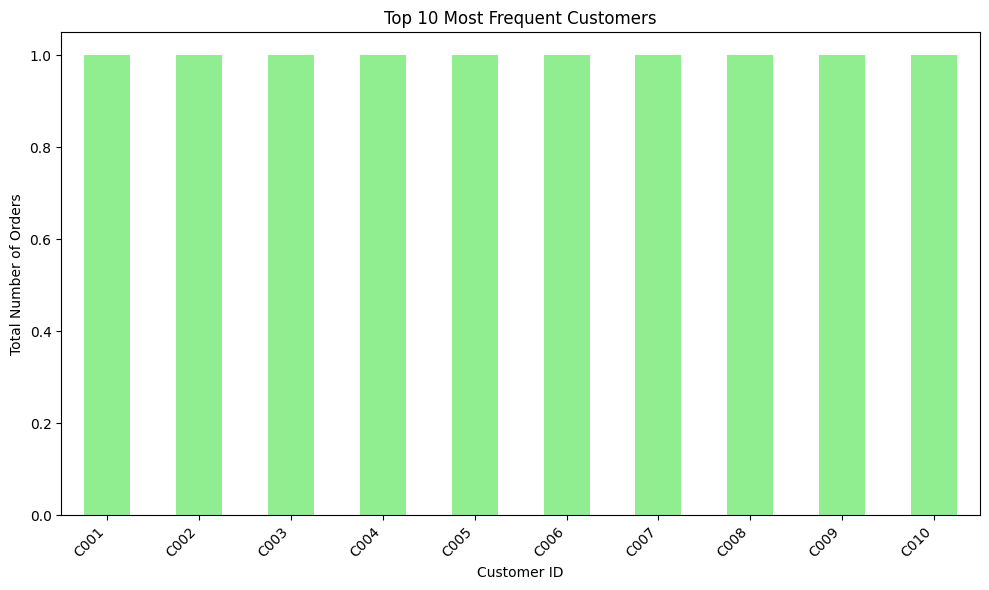

In [22]:
# Calculate the total number of orders for each customer
customer_order_counts = orderFrame['customer_id'].value_counts()

# Sort the customers based on the total number of orders in descending order
top_customers = customer_order_counts.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Product Analysis:

####  The total number of products available by category.

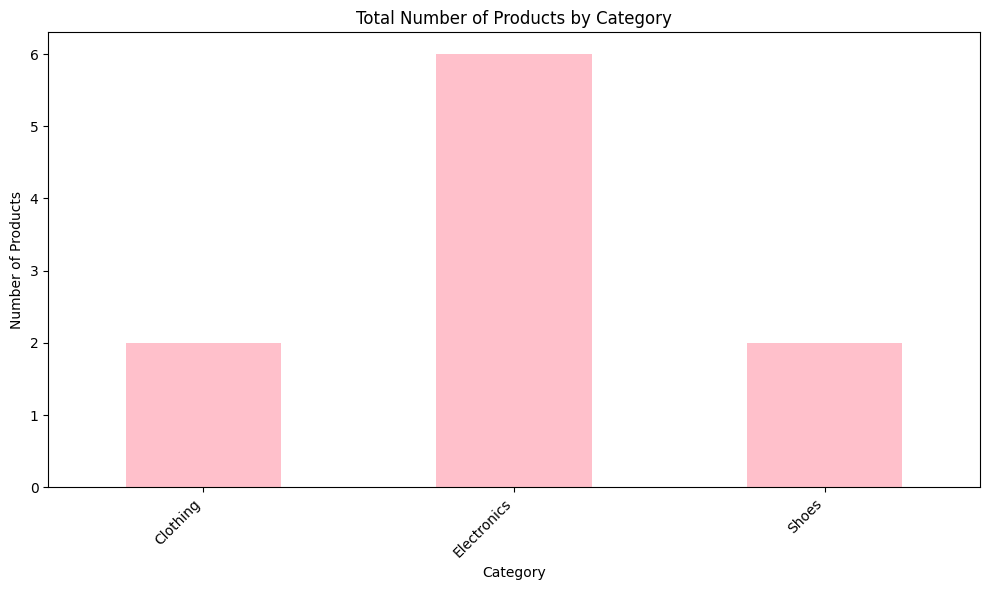

In [23]:
total_products_by_category = productFrame.groupby('category')['product_id'].count()
plt.figure(figsize=(10, 6))
total_products_by_category.plot(kind='bar', color='pink')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Distribution of products across sub-categories
####

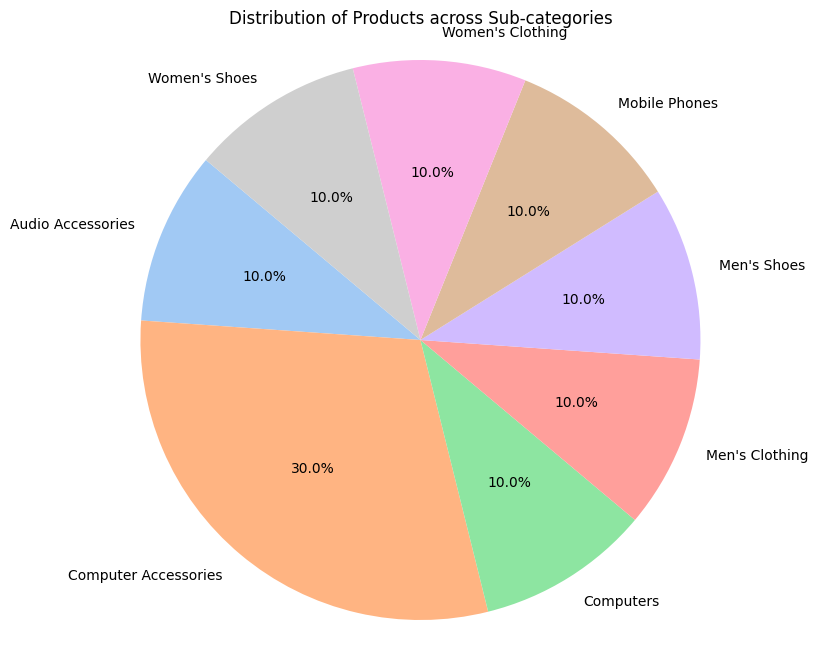

In [24]:
product_distribution_subcategory = productFrame.groupby('sub_category')['product_id'].count()
plt.figure(figsize=(10, 8))
plt.pie(product_distribution_subcategory, labels=product_distribution_subcategory.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Products across Sub-categories')
plt.axis('equal') 
plt.show()


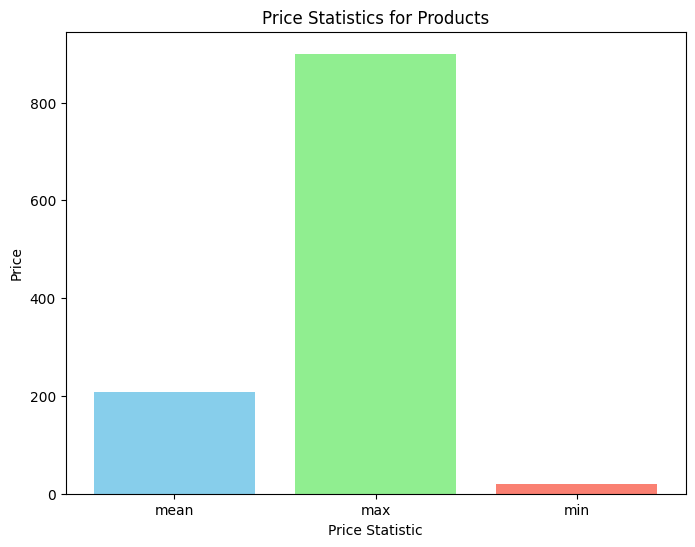

In [25]:
price_stats = productFrame['selling_price'].agg(['mean', 'max', 'min'])

plt.figure(figsize=(8, 6))
plt.bar(price_stats.index, price_stats.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Price Statistics for Products')
plt.xlabel('Price Statistic')
plt.ylabel('Price')
plt.show()


### Order Analysis:

####  Calculate the top 10 orders product wise.

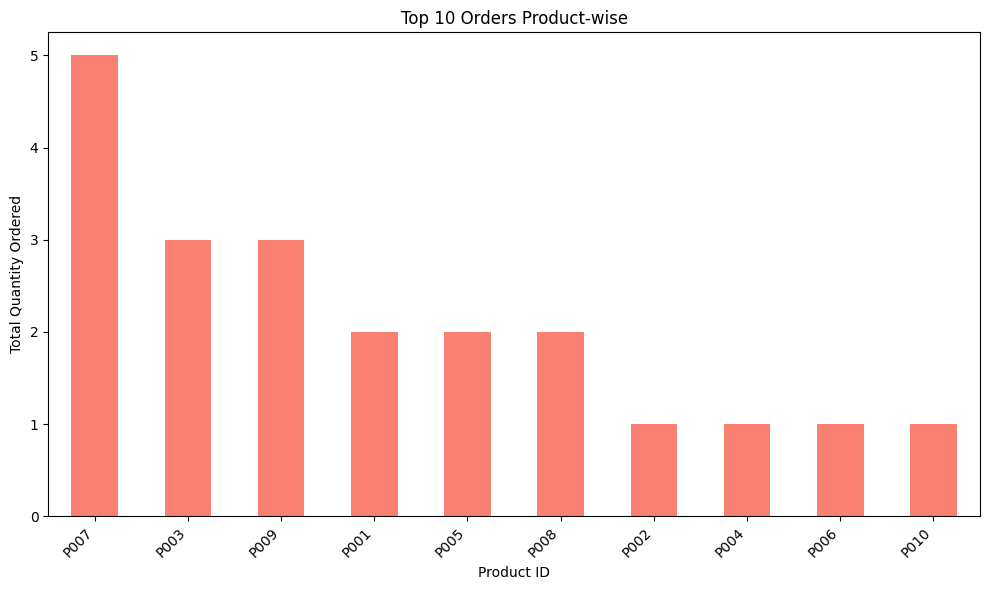

In [26]:
# Calculate the total quantity of each product ordered
product_order_quantity = orderFrame.groupby('product_id')['quantity'].sum()

# Select the top 10 products with the highest total quantity ordered
top_10_products = product_order_quantity.nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### The order status distribution (e.g., pending, delivered)

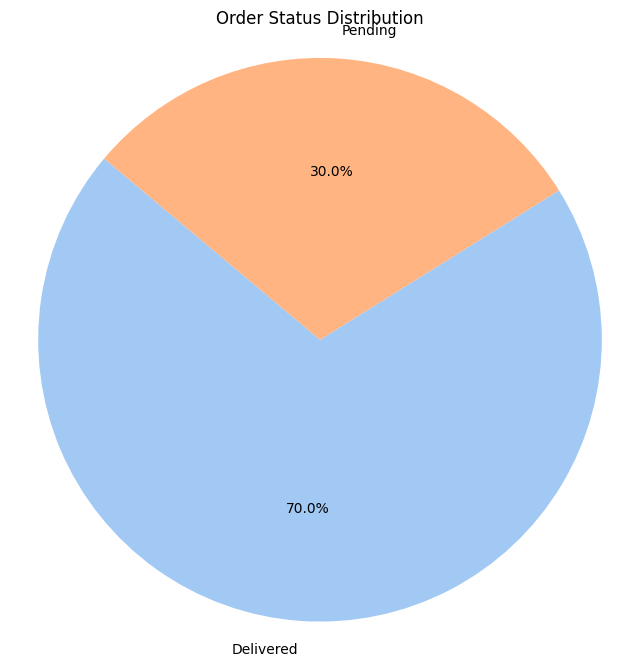

In [27]:
order_status_distribution = orderFrame['order_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Order Status Distribution')
plt.axis('equal') 
plt.show()

### Sales Analysis:

#### Total revenue generated from orders product wise.

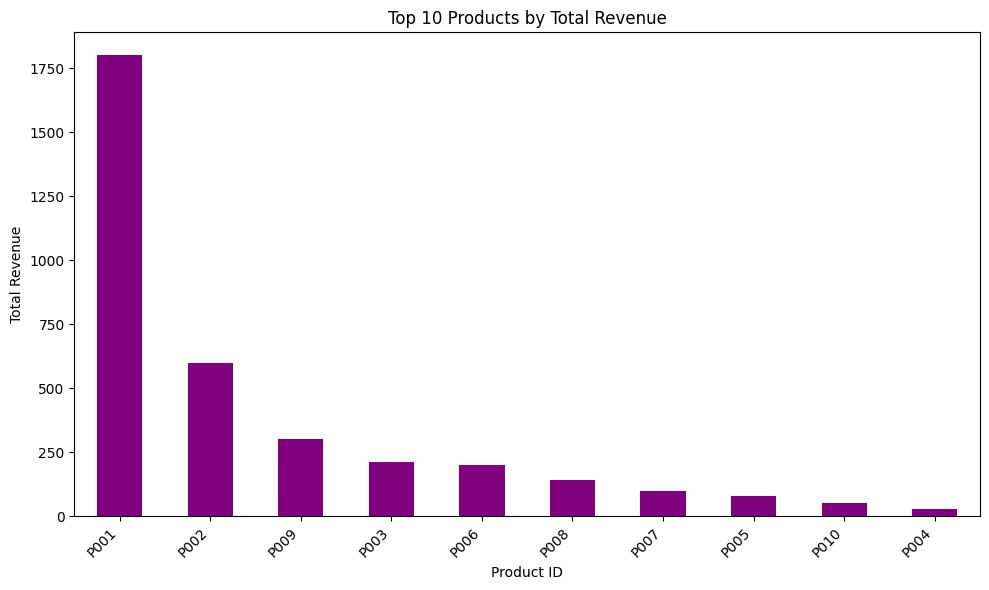

In [28]:
orderFrame['total_revenue'] = orderFrame['quantity'] * orderFrame.merge(productFrame, on='product_id')['selling_price']
product_total_revenue = orderFrame.groupby('product_id')['total_revenue'].sum()
plt.figure(figsize=(10, 6))
product_total_revenue.nlargest(10).plot(kind='bar', color='purple')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Total revenue product category wise percentage

(-1.0999999617135228,
 1.0999998491856926,
 -1.0999998703919556,
 1.099999929967376)

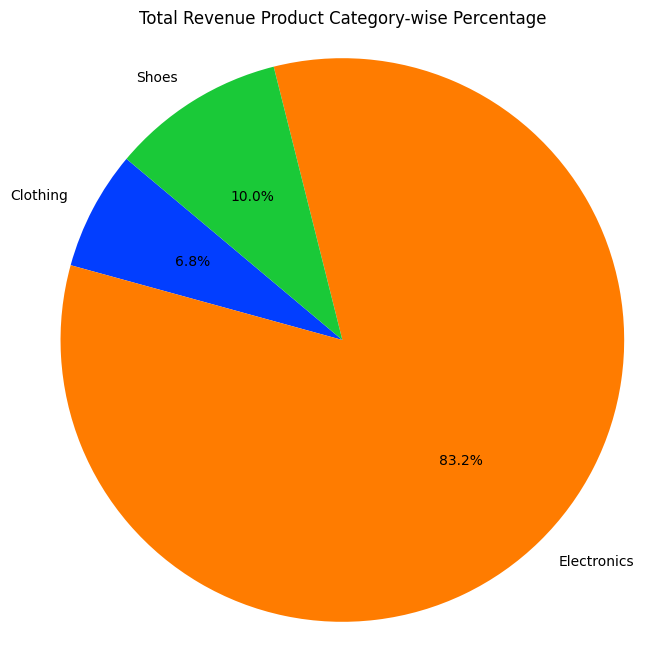

In [29]:
merged_df = orderFrame.merge(productFrame, on='product_id')
merged_df['total_revenue'] = merged_df['quantity'] * merged_df['selling_price']
category_total_revenue = merged_df.groupby('category')['total_revenue'].sum()
percentage_total_revenue = (category_total_revenue / category_total_revenue.sum()) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_total_revenue, labels=percentage_total_revenue.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
plt.title('Total Revenue Product Category-wise Percentage')
plt.axis('equal') 

#### The total revenue generated from all orders

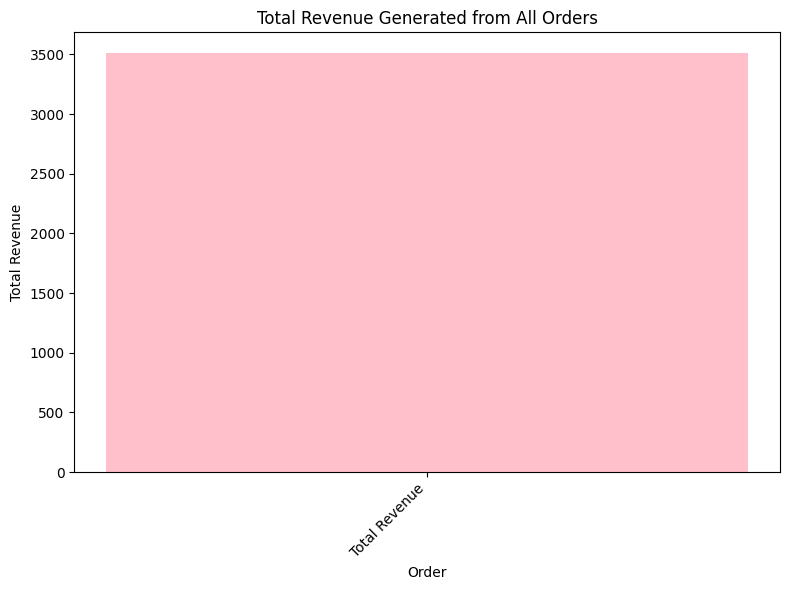

In [30]:
merged_df = orderFrame.merge(productFrame, on='product_id')
merged_df['total_revenue'] = merged_df['quantity'] * merged_df['selling_price']
total_revenue_all_orders = merged_df['total_revenue'].sum()
plt.figure(figsize=(8, 6))
plt.bar(["Total Revenue"], [total_revenue_all_orders], color='pink')
plt.title('Total Revenue Generated from All Orders')
plt.xlabel('Order')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####  The most profitable products based on the difference between original and selling prices.

C:\Users\annes\AppData\Local\Temp\ipykernel_7036\530123449.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_profitable_products.head(10), x='product_id', y='profit', palette='muted')


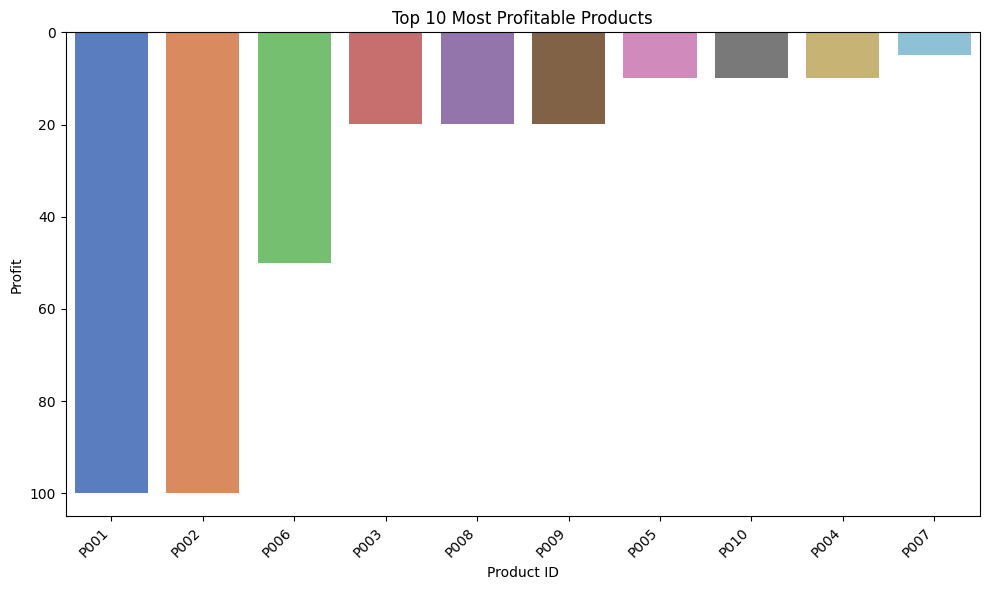

In [31]:
# Calculate the profit for each product
productFrame['profit'] = productFrame['selling_price'] - productFrame['original_price']

# Sort products by profit in descending order
most_profitable_products = productFrame.sort_values(by='profit', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=most_profitable_products.head(10), x='product_id', y='profit', palette='muted')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


### Customer Order Patterns:


#### Products with the highest and lowest order quantities

C:\Users\annes\AppData\Local\Temp\ipykernel_7036\1355803779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Highest Quantity', 'Lowest Quantity'], y=[product_quantities_sorted.iloc[0], product_quantities_sorted.iloc[-1]], palette='pastel')


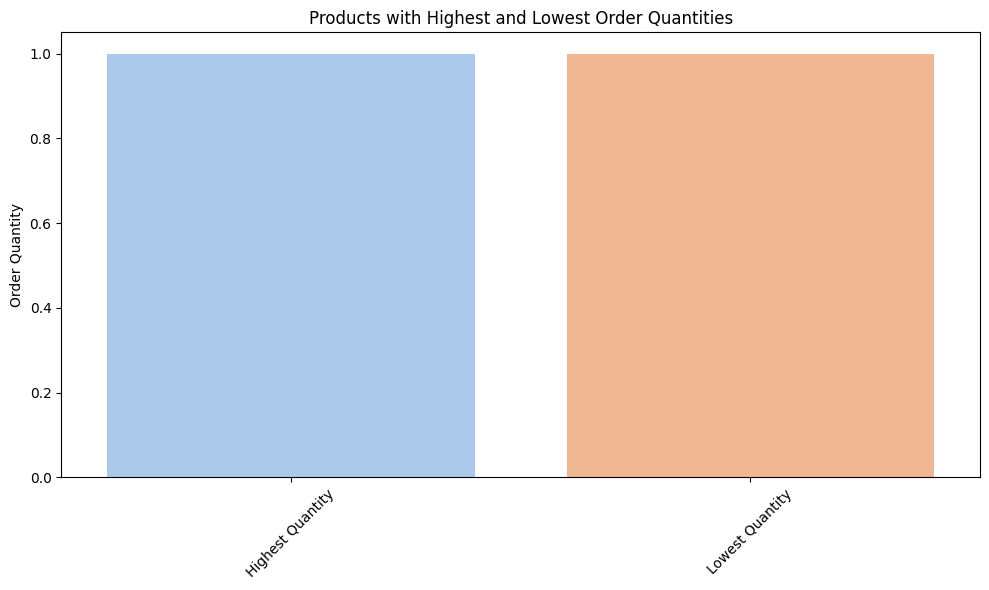

In [36]:
productFrame.reset_index(drop=True, inplace=True)
product_quantities = orderFrame['product_id'].value_counts()
product_quantities_sorted = product_quantities.sort_values(ascending=False)
product_id_highest_quantity = product_quantities_sorted.index[0]
product_id_lowest_quantity = product_quantities_sorted.index[-1]
product_name_highest_quantity = productFrame.loc[productFrame['product_id'] == product_id_highest_quantity, 'product_name'].iloc[0]
product_name_lowest_quantity = productFrame.loc[productFrame['product_id'] == product_id_lowest_quantity, 'product_name'].iloc[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=['Highest Quantity', 'Lowest Quantity'], y=[product_quantities_sorted.iloc[0], product_quantities_sorted.iloc[-1]], palette='pastel')
plt.title('Products with Highest and Lowest Order Quantities')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The most preferred payment modes.

C:\Users\annes\AppData\Local\Temp\ipykernel_7036\270822502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_mode_distribution.index, y=payment_mode_distribution.values, palette='muted')


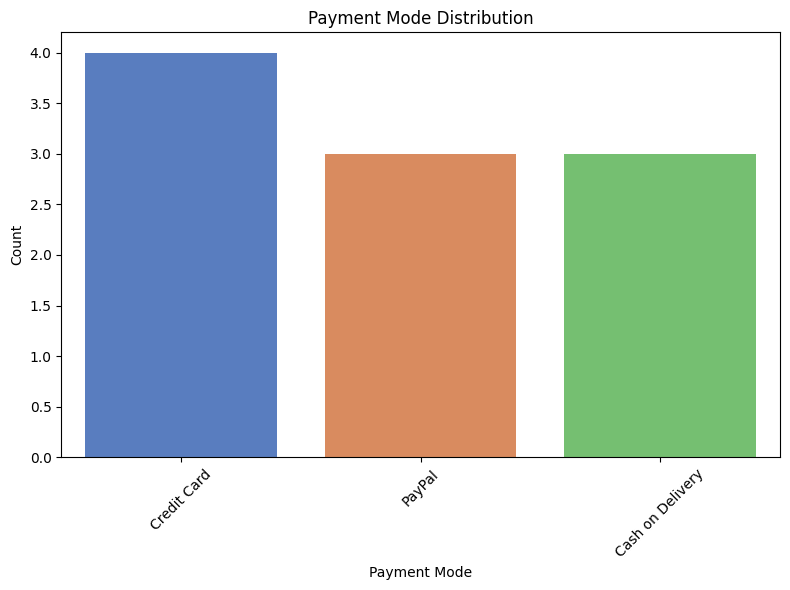

In [37]:
payment_mode_distribution = orderFrame['payment_mode'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_mode_distribution.index, y=payment_mode_distribution.values, palette='muted')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion:

Based on the analysis of the ecommerce order data, here are the key insights and recommendations:

1. **Customer Analysis:**
   - The total number of customers varies across different cities, suggesting varying levels of market penetration.
   - Identify and prioritize cities with the highest customer count for targeted marketing efforts.

2. **Product Analysis:**
   - Products are categorized into different categories and sub-categories, with varying distribution across them.
   - Identify categories and sub-categories with high demand to optimize inventory management and marketing strategies.
   - Products with low stock levels need to be replenished to avoid stockouts and meet customer demand.

3. **Order Analysis:**
   - Most orders are in the "delivered" status, indicating efficient order processing and fulfillment.
   - Identify bottlenecks in order processing for orders in other status categories to improve overall order fulfillment efficiency.

4. **Sales Analysis:**
   - Total revenue generated from orders product-wise provides insights into product performance and profitability.
   - Analyze product category-wise revenue to understand the contribution of each category to overall sales.
   - Identify top-selling products and slow-moving products to optimize marketing strategies and inventory management.

5. **Customer Order Patterns:**
   - Understanding product names with the highest and lowest order quantities helps in identifying customer preferences.
   - Analyze customer order patterns to identify repeat customers and their purchasing behavior for targeted marketing campaigns.

6. **Payment Analysis:**
   - Determine the most preferred payment modes to optimize payment processing and improve customer experience.
   - Ensure support for popular payment modes and consider introducing additional payment options based on customer preferences.

# Future Work:

Here are some potential areas for further analysis or data collection to enhance the depth of insights gained:

1. **Customer Segmentation:**
   - Collect demographic data such as age, gender, income level, and purchasing behavior to segment customers effectively.
   - Analyze customer segments to understand their preferences, needs, and shopping patterns, allowing for personalized marketing strategies.

2. **Product Performance Metrics:**
   - Collect data on product reviews, ratings, and customer feedback to assess product satisfaction and identify areas for improvement.
   - Analyze product return rates and reasons for returns to understand product quality issues and optimize product offerings.

3. **Market Basket Analysis:**
   - Collect data on co-occurrence of products in orders to perform market basket analysis and identify product associations.
   - Analyze patterns of frequently co-purchased products to optimize product bundling, cross-selling, and upselling strategies.

4. **Customer Lifetime Value (CLV):**
   - Collect data on customer acquisition costs, retention rates, and average order value to calculate CLV.
   - Analyze CLV to identify high-value customers and tailor retention strategies to maximize long-term profitability.

5. **Sales Forecasting:**
   - Collect historical sales data along with external factors such as seasonality, promotions, and economic indicators.
   - Develop predictive models to forecast future sales and demand, enabling better inventory planning and resource allocation.

6. **Supply Chain Optimization:**
   - Collect data on supplier performance, lead times, and costs to optimize the supply chain.
   - Analyze supply chain data to identify bottlenecks, reduce costs, and improve efficiency in sourcing, production, and distribution processes.

7. **Customer Journey Analysis:**
   - Collect data on customer interactions across various touchpoints such as website visits, social media engagement, and customer support interactions.
   - Analyze the customer journey to understand behavior patterns, pain points, and opportunities for enhancing the customer experience.

8. **Competitive Analysis:**
   - Collect data on competitors' product offerings, pricing strategies, and customer reviews.
   - Analyze competitive data to benchmark performance, identify market trends, and differentiate the business from competitors.

By focusing on these areas for further analysis or data collection, businesses can gain deeper insights into customer behavior, product performance, market dynamics, and operational efficiency, leading to informed decision-making and sustainable growth.

# Acknowledgement:

We would like to express our heartfelt gratitude to all the individuals at Anudip Foundation who contributed to the success of this project on analyzing Ecommerce Data using Jupyter Notebook. In particular, we extend our deepest appreciation to our esteemed mentor, Mr. Suramya Biswas, whose guidance and support were invaluable throughout the project.

**_Thank you :)_**